In [ ]:
# Problem Statement
# Given the Essay, Evaluate the essay based on the following criteria:
# 1. Language Quality
# 2. Clarity of the Thoughts
# 3. Depth of Analaysis

# Solution
# Create a workflow which will take the Essay as input and will output a score output of 10 and generate the overall feedback.

In [8]:
from typing import TypedDict
from typing import Annotated
import operator
from langgraph.graph import StateGraph,START,END
from langchain_groq import ChatGroq
from pydantic import BaseModel, Field
import os
from dotenv import load_dotenv
load_dotenv()

True

In [9]:
class Schema(BaseModel):
    feedback:str = Field(description='Detailed Feedback for essay')
    score:int = Field(description='Score out of 10 for essay')

In [13]:
class EssayState(TypedDict):
    essay:str
    language_quality_feedback:str
    clarity_of_thoughts_feedback:str
    depth_of_analysis_feedback:str
    individual_scores:Annotated[list[int],operator.add]
    overall_feedback:str
    overall_score:int

In [11]:
llm = ChatGroq(model=os.getenv("MODEL_NAME"),api_key=os.getenv("GROK_API_KEY"))
llm_structure = llm.with_structured_output(schema=Schema)


In [37]:
def language_quality(state:EssayState):
    prompt = f"""Evaluate the essay based on language quality and provide the feedback and score out of 10 

    ESSAY:
    {state['essay']}

    """    
    response = llm_structure.invoke(prompt)
    return {"language_quality_feedback":response.feedback,"individual_scores":[response.score]}

def clarity_of_thoughts(state:EssayState):
    prompt = f"""Evaluate the essay based on clarity of thoughts and provide the feedback and score out of 10 

    ESSAY:
    {state['essay']}

    """    
    response = llm_structure.invoke(prompt)
    return {"clarity_of_thoughts_feedback":response.feedback,"individual_scores":[response.score]}

def depth_of_analysis(state:EssayState):
    prompt = f"""Evaluate the essay based on depth of analysis and provide the feedback and score out of 10 

    ESSAY:
    {state['essay']}

    """    
    response = llm_structure.invoke(prompt)
    return {"depth_of_analysis_feedback":response.feedback,"individual_scores":[response.score]}

def final_summary(state:EssayState):
    prompt = f"""Evaluate the following feedbacks and Generate the Summary on it:

    Language_quality_feedback:

    {state['language_quality_feedback']}

    clarity_of_thoughts_feedback:

    {state['clarity_of_thoughts_feedback']}

    depth_of_analysis_feedback:

    {state['depth_of_analysis_feedback']}

    """
    overall_feedback = llm.invoke(prompt).content

    overall_score = sum(state['individual_scores'])/len(state['individual_scores'])


    return {"overall_feedback":overall_feedback,"overall_score":overall_score}


In [41]:
# define graph
graph = StateGraph(EssayState)
graph.add_node("language_quality",language_quality)
graph.add_node("clarity_of_thoughts",clarity_of_thoughts)
graph.add_node("depth_of_analysis",depth_of_analysis)
graph.add_node("final_summary",final_summary)

graph.add_edge(START,"language_quality")
graph.add_edge(START,"clarity_of_thoughts")
graph.add_edge(START,"depth_of_analysis")

graph.add_edge("language_quality","final_summary")
graph.add_edge("clarity_of_thoughts","final_summary")
graph.add_edge("depth_of_analysis","final_summary")
graph.add_edge("final_summary",END)

workflow = graph.compile()

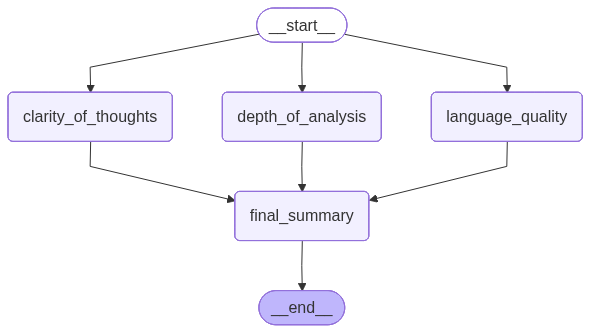

In [42]:
workflow

In [43]:
essay = """## Artificial Intelligence in India

Artificial Intelligence (AI) is transforming the world by enabling machines to think, learn, and make decisions like humans. In recent years, India has emerged as one of the fastest-growing adopters of AI technologies. With its strong IT industry, large talent pool, and increasing digital infrastructure, AI is playing a crucial role in shaping India’s economic and social future.

### Growth of AI in India

India’s AI journey gained momentum with the government’s Digital India, Startup India, and National Strategy for Artificial Intelligence initiatives. NITI Aayog has identified AI as a key driver for economic growth and social development. Today, AI is being actively used in sectors such as healthcare, agriculture, education, finance, manufacturing, and governance.

Indian startups and IT companies are heavily investing in AI-based solutions, while global technology companies are setting up AI research centers in India due to the availability of skilled engineers and data scientists.

### Applications of AI in India

AI is solving real-world problems in India:

- Healthcare: AI helps in early disease detection, medical imaging, personalized treatment, and remote diagnosis, especially benefiting rural areas.
- Agriculture: AI-based tools assist farmers with crop prediction, soil analysis, pest detection, and weather forecasting.
- Education: AI-powered platforms provide personalized learning, automated assessments, and virtual tutors.
- Finance: Banks and fintech companies use AI for fraud detection, credit scoring, chatbots, and risk management.
- Governance: AI is used in traffic management, smart cities, crime analysis, and efficient delivery of public services.

### Role of Startups and Industry

India has a vibrant AI startup ecosystem. Many startups are building AI solutions tailored to Indian challenges such as language diversity, low-resource environments, and affordability. Major IT companies like TCS, Infosys, and Wipro are integrating AI into enterprise solutions.

India’s focus on Generative AI, machine learning, and automation is also creating new job opportunities and increasing global competitiveness.

### Challenges in AI Adoption

Despite rapid growth, India faces several challenges:

- Skill gap in advanced AI research
- Poor quality and unstructured data
- Ethical concerns such as bias and privacy
- Limited access to high-end computing infrastructure

Addressing these challenges is essential for responsible AI growth.

### Future of AI in India

The future of AI in India is promising. With increased investment in research, education, and infrastructure, India can become a global AI hub. Ethical policies and skill development programs will further strengthen AI adoption.

### Conclusion

Artificial Intelligence is not just a technological advancement for India—it is a transformative force driving economic growth and social progress. By responsibly adopting AI and investing in innovation, India can harness its full potential and emerge as a global leader in AI-driven solutions.
"""

In [44]:
initial_state = {"essay":essay}
final_state = workflow.invoke(initial_state)

In [46]:
final_state

{'essay': '## Artificial Intelligence in India\n\nArtificial Intelligence (AI) is transforming the world by enabling machines to think, learn, and make decisions like humans. In recent years, India has emerged as one of the fastest-growing adopters of AI technologies. With its strong IT industry, large talent pool, and increasing digital infrastructure, AI is playing a crucial role in shaping India’s economic and social future.\n\n### Growth of AI in India\n\nIndia’s AI journey gained momentum with the government’s Digital India, Startup India, and National Strategy for Artificial Intelligence initiatives. NITI Aayog has identified AI as a key driver for economic growth and social development. Today, AI is being actively used in sectors such as healthcare, agriculture, education, finance, manufacturing, and governance.\n\nIndian startups and IT companies are heavily investing in AI-based solutions, while global technology companies are setting up AI research centers in India due to the